In [2]:
from scipy import signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Extract the local field potential (LFP) of each channel.

#### Use a low-pass filter with a cutoff of 300 Hz. 

In [3]:
fs = 32556 #Hz

In [4]:
def extract_lfp(data): 
    nyq = 0.5 * fs
    cutOff = 300 #Hz
    normalCutoff = cutOff / nyq
    order = 2
    b, a = signal.butter(order, normalCutoff, btype='low')
    y = signal.lfilter(b, a, data)
    return y

In [5]:
def extract_lfp_bp(data): 
    nyq = 0.5 * fs
    cutOff_L = 15;
    cutOff_H = 300;
    low = cutOff_L / nyq
    high = cutOff_H / nyq
    order = 2
    b, a = signal.butter(order, [low, high], btype='band')
    y = signal.lfilter(b, a, data)
    return y

In [6]:
def notch_filter(data): 
    f0 = 60.0 
    Q = 30.0  # quality factor
    w0 = f0/(fs/2)  
    b, a = signal.iirnotch(w0, Q)
    y = signal.lfilter(b, a, data)
    return y

## Load sample data to compute on for Stimulus A.

In [7]:
col_labels = []
for i in range(0, 16): 
    l = 'Ch' + str(i + 1)
    col_labels.append(l)
just_ch = col_labels.copy()
col_labels.append('Time')

In [111]:
filepath = 'data/data/Stimulus_B/stim_B_1.csv'
df = pd.read_csv(filepath, names = col_labels)
df.head()

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,Ch9,Ch10,Ch11,Ch12,Ch13,Ch14,Ch15,Ch16,Time
0,0.003021,-0.005066,0.004578,-0.008545,-0.057861,-0.033386,-0.036987,-0.023773,-0.002563,-0.017731,-0.020172,-0.027069,-0.017059,-0.011444,-0.003174,-0.059021,1.707366e+07
1,0.017548,-0.000946,0.002289,0.003265,-0.082336,-0.043854,-0.050110,-0.026886,-0.001160,-0.008575,0.003845,-0.016846,-0.005615,0.009613,0.028839,-0.027527,1.707369e+07
2,0.015747,-0.001526,-0.002289,0.008087,-0.095245,-0.049316,-0.084564,-0.036072,-0.002899,-0.000031,0.002960,-0.001465,0.006927,0.023804,0.049286,-0.006622,1.707372e+07
3,-0.003326,-0.004517,-0.006226,0.001221,-0.100281,-0.055267,-0.124878,-0.052917,-0.004456,0.000427,-0.021393,0.008118,0.015503,0.026581,0.051208,-0.006042,1.707375e+07
4,-0.026428,-0.006317,-0.007385,-0.009735,-0.098236,-0.060974,-0.143280,-0.067566,-0.004333,-0.006073,-0.046478,0.005371,0.017975,0.021332,0.041412,-0.015045,1.707378e+07


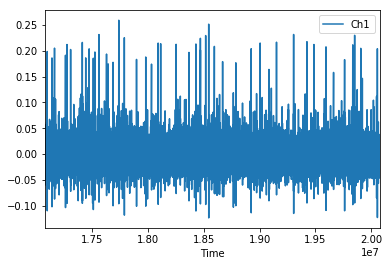

In [112]:
df.plot(x = 'Time', y = 'Ch1'[0:500], kind= 'line')
plt.show()

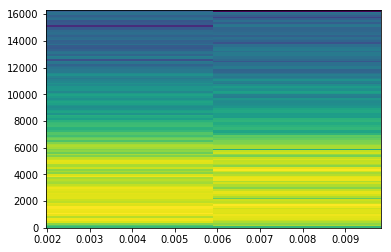

In [113]:
plt.specgram(df['Ch1'][0:500], Fs = fs)
plt.show()

#### Apply function to single channel.

In [114]:
ch1 = extract_lfp_bp(df['Ch1'])
ch1_nobp = extract_lfp(notch_filter(df['Ch1']))

#### Visualize LFP's (just low pass)

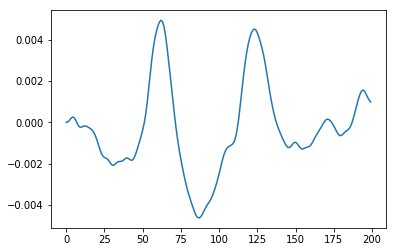

In [115]:
plt.plot(ch1_nobp[0:200])
plt.show()

#### Visualize LFP's (with bandpass)

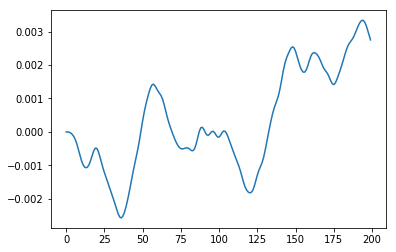

In [86]:
plt.plot(ch1[0:200])
# plt.ylim((-0.05, 0.05))
plt.show()

#### Spectrogram

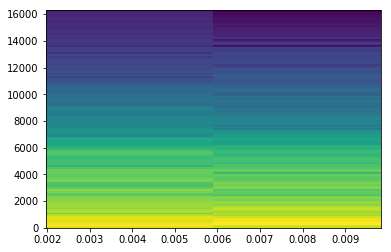

In [87]:
plt.specgram(ch1[0:500], Fs = fs)
plt.show()

## Load sample data for Stimulus B.

In [88]:
filepath = 'data/data/Stimulus_B/stim_B_1.csv'
df2 = pd.read_csv(filepath, names = col_labels)
df2.head()

FileNotFoundError: File b'Stimulus_B/stim_B_1.csv' does not exist

In [ ]:
df2.plot(x = 'Time', y = 'Ch1'[0:100], kind= 'line')
plt.show()

In [ ]:
plt.specgram(df2['Ch1'][0:500], Fs = fs)
plt.show()

In [ ]:
ch1_2 = extract_lfp_bp(notch_filter(df2['Ch1']))
ch1_nobp_2 = extract_lfp(notch_filter(df2['Ch1']))

#### LFP, just low pass 300 Hz

In [ ]:
plt.plot(ch1_nobp_2[0:200])
# plt.ylim((-0.05, 0.05))
plt.show()

#### LFP, bandpass 

In [ ]:
plt.plot(ch1_2[0:200])
plt.show()

#### Plot Spectrogram 

In [ ]:
plt.specgram(ch1_2[0:500], Fs = fs)
plt.show()

## Apply Function to all channels.

In [ ]:
df[just_ch] = df[just_ch].apply(extract_lfp_bp)

In [ ]:
df.head()

In [ ]:
df2[just_ch] = df2[just_ch].apply(extract_lfp_bp)

In [ ]:
df2.head()